In [67]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

In [68]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("training images shape: ", x_train.shape, "type: ",type(x_train))
print("testing images shape: ", x_test.shape,"type: ",type(x_test))
print("training images shape: ", y_train.shape, "type: ",type(y_train))
print("testing images shape: ", y_test.shape, "type: ",type(y_test))

training images shape:  (60000, 28, 28) type:  <class 'numpy.ndarray'>
testing images shape:  (10000, 28, 28) type:  <class 'numpy.ndarray'>
training images shape:  (60000,) type:  <class 'numpy.ndarray'>
testing images shape:  (10000,) type:  <class 'numpy.ndarray'>


In [69]:
#Only use even numbers for training
even_filter = np.where((y_train % 2 ==0))

#Apply even number filter
x_train_even = x_train[even_filter]
y_train_even = y_train[even_filter]

#Convert input data matrices to vectors (flatten)
x_train_even = x_train_even.reshape(29492, 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')

print(y_train_even.shape)
print(x_train_even.shape)

(29492,)
(29492, 784)


In [70]:
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(x_train_even, y_train_even)

KNeighborsClassifier(n_neighbors=3)

In [71]:
knn.score(x_test, y_test)

0.4861

In [72]:
knn.predict(x_test)

array([2, 2, 4, ..., 4, 8, 6], dtype=uint8)

In [73]:
cm = confusion_matrix(y_test, knn.predict(x_test))

Text(95.72222222222221, 0.5, 'Actual')

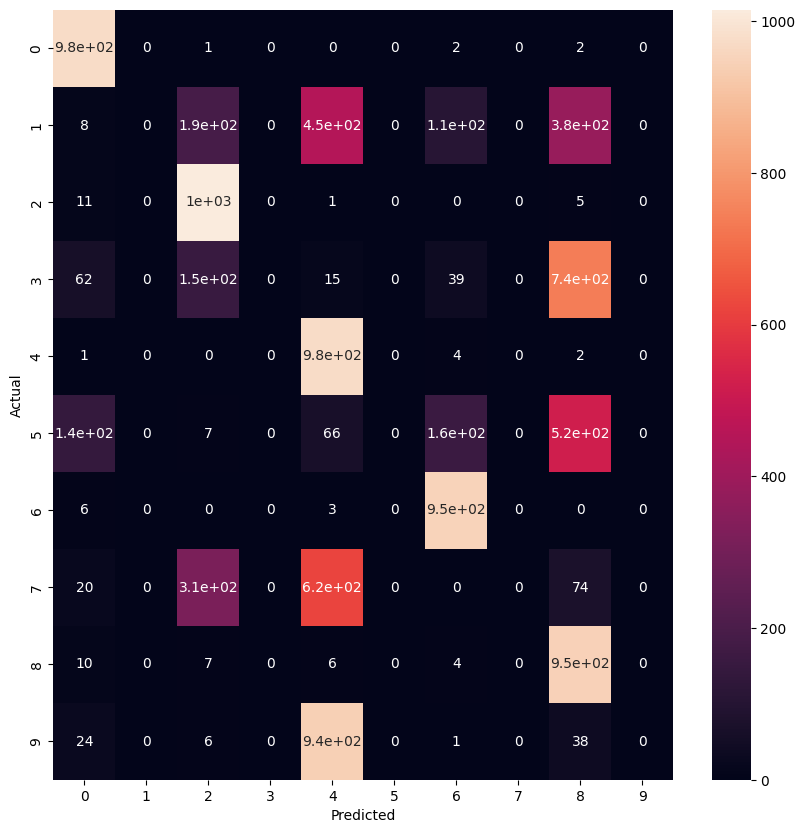

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Prepare the data